In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('../Data/data_educacion.csv')
df2 = pd.read_csv('../Data/data_esperanza_vida.csv')
df3 = pd.read_csv('../Data/data_gasto_salud.csv')
df4 = pd.read_csv('../Data/data_inflacion.csv')

In [4]:
df_concat = pd.concat([df1,df2,df3,df4])

In [5]:
df_concat.sort_values('país', inplace=True)

In [6]:
#df_concat.to_csv('../Data/merge_data.csv', index=False)

In [7]:
df = pd.read_csv('../Data/merge_data.csv')

In [8]:
df

,país,factor_(serie),Año,Valor
0,Afganistán,"Nivel de instrucción, al menos ciclo inferior ...",1987,13.366867
1,Afganistán,"Esperanza de vida al nacer, varones (años)",1992,45.070000
2,Afganistán,"Nivel de instrucción, al menos ciclo inferior ...",1992,13.366867
3,Afganistán,"Nivel de instrucción, al menos ciclo superior ...",1992,10.617000
4,Afganistán,"Nivel de instrucción, al menos escuela de nive...",1992,4.704900
...,...,...,...,...
19003,Venezuela,"Inflación, precios al consumidor (% anual)",1993,72.740275
19004,Venezuela,"Inflación, índice de deflación del PIB (% anual)",1993,31.645800
19005,Venezuela,Tasa de finalización del ciclo inferior de la ...,1993,42.518900
19006,Venezuela,"Esperanza de vida al nacer, mujeres (años)",1991,74.393000


In [9]:
# Agrupar por la columna 'factor_(serie)' y calcular estadísticas resumidas
grouped = df.groupby('factor_(serie)').describe()
grouped


Año                     \
                                                     count    mean        std   
factor_(serie)                                                                  
Esperanza de vida al nacer, mujeres (años)          1584.0  2004.5  10.391575   
Esperanza de vida al nacer, total (años)            1584.0  2004.5  10.391575   
Esperanza de vida al nacer, varones (años)          1584.0  2004.5  10.391575   
Gasto de bolsillo per cápita (US$ actuales)         1584.0  2004.5  10.391575   
Gasto interno privado en salud per cápita (US$ ...  1584.0  2004.5  10.391575   
Gasto nacional en salud del gobierno general pe...  1584.0  2004.5  10.391575   
Inflación, precios al consumidor (% anual)          1584.0  2004.5  10.391575   
Inflación, índice de deflación del PIB (% anual)    1584.0  2004.5  10.391575   
Nivel de instrucción, al menos ciclo inferior d...  1584.0  2004.5  10.391575   
Nivel de instrucción, al menos ciclo superior d...  1584.0  2004.5  10.391575   
Nivel de instrucción, al menos escuela de nivel...  1584.0  2004.5  10.391575   
Tasa de finalización del ciclo inferior de la e...  1584.0  2004.5  10.391575   

                                                                             \
                                                       min      25%     50%   
factor_(serie)                                                                
Esperanza de vida al nacer, mujeres (años)          1987.0  1995.75  2004.5   
Esperanza de vida al nacer, total (años)            1987.0  1995.75  2004.5   
Esperanza de vida al nacer, varones (años)          1987.0  1995.75  2004.5   
Gasto de bolsillo per cápita (US$ actuales)         1987.0  1995.75  2004.5   
Gasto interno privado en salud per cápita (US$ ...  1987.0  1995.75  2004.5   
Gasto nacional en salud del gobierno general pe...  1987.0  1995.75  2004.5   
Inflación, precios al consumidor (% anual)          1987.0  1995.75  2004.5   
Inflación, índice de deflación del PIB (% anual)    1987.0  1995.75  2004.5   
Nivel de instrucción, al menos ciclo inferior d...  1987.0  1995.75  2004.5   
Nivel de instrucción, al menos ciclo superior d...  1987.0  1995.75  2004.5   
Nivel de instrucción, al menos escuela de nivel...  1987.0  1995.75  2004.5   
Tasa de finalización del ciclo inferior de la e...  1987.0  1995.75  2004.5   

                                                                      Valor  \
                                                        75%     max   count   
factor_(serie)                                                                
Esperanza de vida al nacer, mujeres (años)          2013.25  2022.0  1584.0   
Esperanza de vida al nacer, total (años)            2013.25  2022.0  1584.0   
Esperanza de vida al nacer, varones (años)          2013.25  2022.0  1584.0   
Gasto de bolsillo per cápita (US$ actuales)         2013.25  2022.0  1584.0   
Gasto interno privado en salud per cápita (US$ ...  2013.25  2022.0  1584.0   
Gasto nacional en salud del gobierno general pe...  2013.25  2022.0  1584.0   
Inflación, precios al consumidor (% anual)          2013.25  2022.0  1584.0   
Inflación, índice de deflación del PIB (% anual)    2013.25  2022.0  1584.0   
Nivel de instrucción, al menos ciclo inferior d...  2013.25  2022.0  1584.0   
Nivel de instrucción, al menos ciclo superior d...  2013.25  2022.0  1584.0   
Nivel de instrucción, al menos escuela de nivel...  2013.25  2022.0  1584.0   
Tasa de finalización del ciclo inferior de la e...  2013.25  2022.0  1584.0   

                                                                              \
                                                           mean          std   
factor_(serie)                                                                 
Esperanza de vida al nacer, mujeres (años)            73.371412    10.436615   
Esperanza de vida al nacer, total (años)              70.892305     9.983604   
Esperanza de vida al nacer, varones (años)            68.528655    

In [10]:
df['factor_(serie)'].unique()

array(['Nivel de instrucción, al menos ciclo inferior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)',
       'Esperanza de vida al nacer, varones (años)',
       'Nivel de instrucción, al menos ciclo superior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)',
       'Nivel de instrucción, al menos escuela de nivel posterior a la secundaria completa, población de más de 25 años, total (%) (acumulativo)',
       'Tasa de finalización del ciclo inferior de la educación secundaria, total (% del grupo etario pertinente)',
       'Inflación, precios al consumidor (% anual)',
       'Inflación, índice de deflación del PIB (% anual)',
       'Esperanza de vida al nacer, total (años)',
       'Esperanza de vida al nacer, mujeres (años)',
       'Gasto interno privado en salud per cápita (US$ a precios actuales)',
       'Gasto de bolsillo per cápita (US$ actuales)',
       'Gasto nacional en salud del gobierno gene

In [11]:
# Calcular la matriz de correlación para el DataFrame reorganizado
matriz_correlacion_reorganizado = df.pivot_table(index='país', columns='factor_(serie)', values='Valor').corr()

# Mostrar la matriz de correlación para el DataFrame reorganizado
matriz_correlacion_reorganizado

factor_(serie),"Esperanza de vida al nacer, mujeres (años)","Esperanza de vida al nacer, total (años)","Esperanza de vida al nacer, varones (años)",Gasto de bolsillo per cápita (US$ actuales),Gasto interno privado en salud per cápita (US$ a precios actuales),Gasto nacional en salud del gobierno general per cápita (US$ a precios actuales),"Inflación, precios al consumidor (% anual)","Inflación, índice de deflación del PIB (% anual)","Nivel de instrucción, al menos ciclo inferior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)","Nivel de instrucción, al menos ciclo superior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)","Nivel de instrucción, al menos escuela de nivel posterior a la secundaria completa, población de más de 25 años, total (%) (acumulativo)","Tasa de finalización del ciclo inferior de la educación secundaria, total (% del grupo etario pertinente)"
factor_(serie),,,,,,,,,,,,
"Esperanza de vida al nacer, mujeres (años)",1.000000,0.996848,0.986262,0.627722,0.465611,0.630840,-0.004006,0.009133,0.787403,0.788575,0.638956,0.462321
"Esperanza de vida al nacer, total (años)",0.996848,1.000000,0.996180,0.635993,0.472830,0.642933,-0.031381,-0.023931,0.779398,0.772960,0.627574,0.447704
"Esperanza de vida al nacer, varones (años)",0.986262,0.996180,1.000000,0.637630,0.475120,0.648598,-0.060316,-0.060512,0.765961,0.750918,0.614183,0.429938
Gasto de bolsillo per cápita (US$ actuales),0.627722,0.635993,0.637630,1.000000,0.891440,0.777579,-0.110928,-0.124483,0.652117,0.704450,0.522903,0.309900
Gasto interno privado en salud per cápita (US$ a precios actuales),0.465611,0.472830,0.475120,0.891440,1.000000,0.589759,-0.084165,-0.104710,0.534222,0.594468,0.310053,0.241683
Gasto nacional en salud del gobierno general per cápita (US$ a precios actuales),0.630840,0.642933,0.648598,0.777579,0.589759,1.000000,-0.166542,-0.186369,0.724259,0.749282,0.559777,0.239399
"Inflación, precios al consumidor (% anual)",-0.004006,-0.031381,-0.060316,-0.110928,-0.084165,-0.166542,1.000000,0.843201,-0.045285,-0.031595,-0.132732,-0.104856
"Inflación, índice de deflación del PIB (% anual)",0.009133,-0.023931,-0.060512,-0.124483,-0.104710,-0.186369,0.843201,1.000000,-0.056159,-0.029271,-0.185780,-0.033925
"Nivel de instrucción, al menos ciclo inferior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)",0.787403,0.779398,0.765961,0.652117,0.534222,0.724259,-0.045285,-0.056159,1.000000,0.945601,0.712368,0.509677


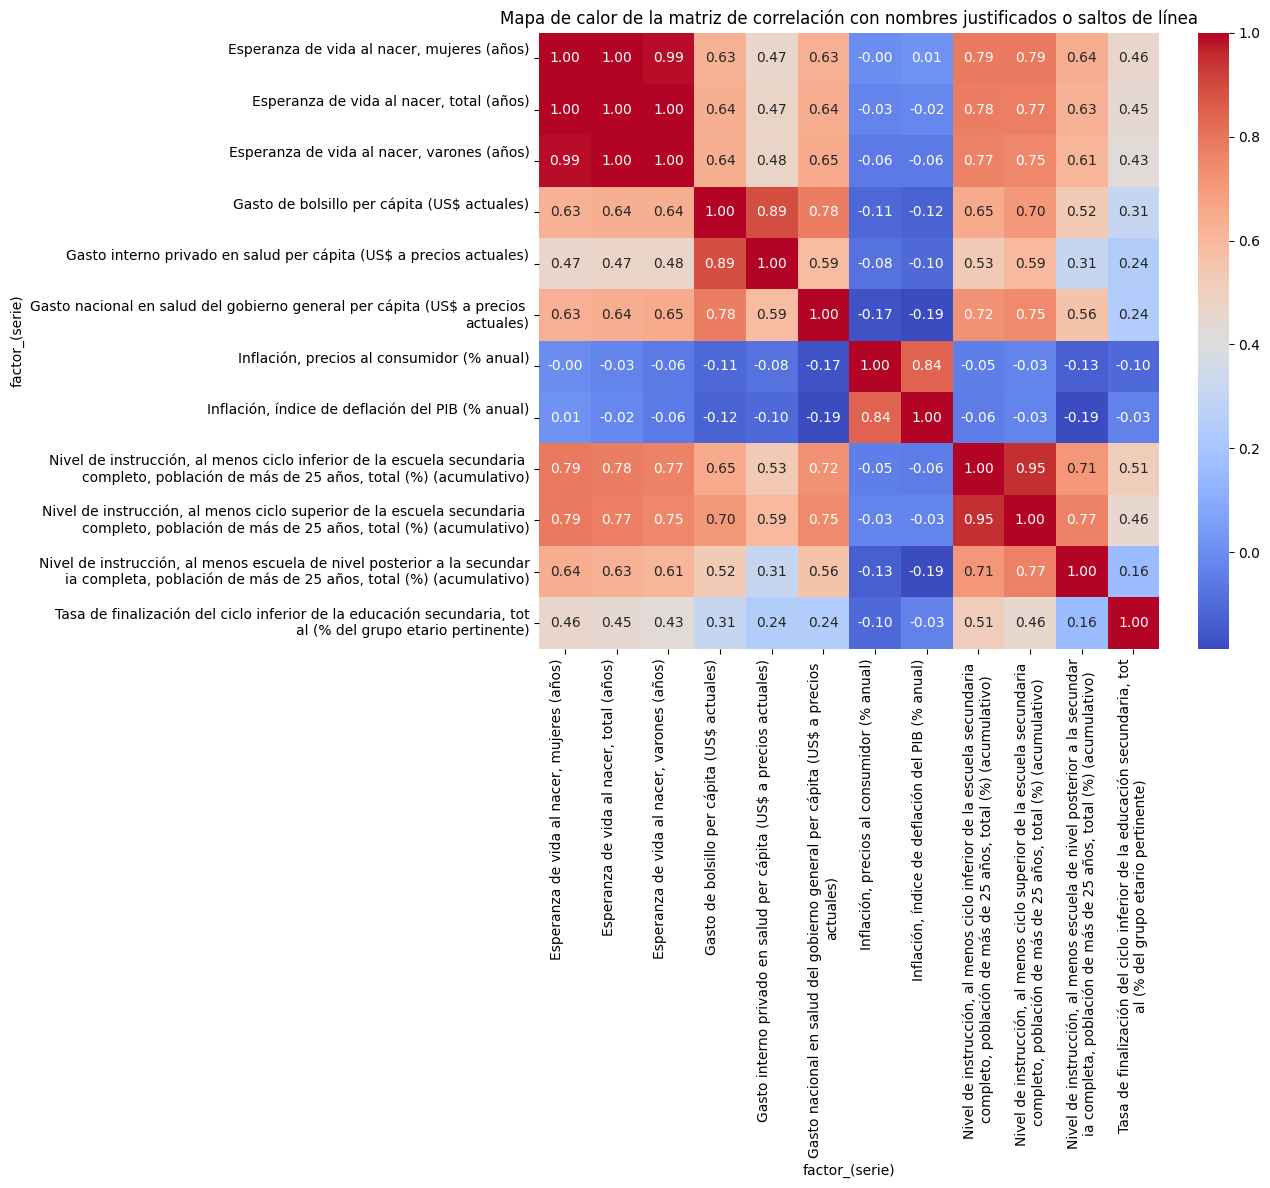

In [12]:


# Suponiendo que 'matriz_correlacion' es tu matriz de correlación

plt.figure(figsize=(10, 8))

# Modificar los nombres de las columnas para que tengan saltos de línea o estén justificados
# Ejemplo: insertar un salto de línea si el nombre es muy largo
nuevos_nombres_columnas = [nombre[:71] + '\n' + nombre[71:] if len(nombre) > 10 else nombre for nombre in matriz_correlacion_reorganizado.columns]

# Crear el mapa de calor con los nombres modificados
sns.heatmap(matriz_correlacion_reorganizado, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=nuevos_nombres_columnas, yticklabels=nuevos_nombres_columnas)

plt.title('Mapa de calor de la matriz de correlación con nombres justificados o saltos de línea')
plt.show()
